# Load Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
restocking_records = pd.read_csv('Restocking_Records_Data.csv')
restocking_records

,Restock Date,Product Name,Supplier,Quantity Purchased,Purchase Price per Unit,Total Purchase Value
0,2024-08-06,Non-stick Tawa,Bharat Appliances,55,1044.31,57437.05
1,2023-07-20,Non-stick Tawa,KitchenKraft,43,1554.69,66851.67
2,2025-01-30,Non-stick Tawa,Bharat Appliances,57,1859.27,105978.39
3,2023-11-16,Non-stick Tawa,RetailBazaar,23,1340.00,30820.00
4,2024-11-26,Gas Stove,Steel Mart,10,1487.79,14877.90
...,...,...,...,...,...,...
295,2023-11-13,Kadhai,KitchenKraft,14,1582.69,22157.66
296,2024-02-09,Electric Kettle,KitchenKraft,62,616.45,38219.90
297,2024-12-03,Gas Stove,Metro Traders,15,921.10,13816.50
298,2025-05-29,Electric Kettle,Bharat Appliances,64,336.41,21530.24


In [ ]:
restocking_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restock Date             300 non-null    object 
 1   Product Name             300 non-null    object 
 2   Supplier                 300 non-null    object 
 3   Quantity Purchased       300 non-null    int64  
 4   Purchase Price per Unit  300 non-null    float64
 5   Total Purchase Value     300 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [ ]:
Sales_Data = pd.read_csv('Extended_Sales_Data.csv')
Sales_Data

,Date,Product Name,Quantity Sold,Sale Price,Total Sale Value
0,12-07-2024,Gas Stove (large),1.0,2133.22,2133.22
1,05/25/2024,Gas Stove (large),-1.0,NaN,NaN
2,01/29/2024,Electric Kettle,2.0,2405.17,4810.34
3,06/29/2024,Hand Blender (small),5.0,1262.97,6314.85
4,10/22/2023,Stainless Steel Kadhai Pro,3.0,1693.37,5080.11
...,...,...,...,...,...
995,29-11-2024,Non-stick Tawa (small),5.0,319.58,1597.90
996,21-01-2024,Electric Kettle,5.0,1815.27,9076.35
997,2025-05-20,Induction Cooktop Deluxe,-1.0,NaN,NaN
998,28-12-2023,Gas Stove (large),-1.0,NaN,NaN


In [ ]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              999 non-null    object 
 1   Product Name      999 non-null    object 
 2   Quantity Sold     999 non-null    float64
 3   Sale Price        801 non-null    float64
 4   Total Sale Value  801 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


# Data Cleaning

In [ ]:
restocking_records.isnull().sum()

,0
Restock Date,0
Product Name,0
Supplier,0
Quantity Purchased,0
Purchase Price per Unit,0
Total Purchase Value,0


In [ ]:
Sales_Data.isnull().sum()

,0
Date,1
Product Name,1
Quantity Sold,1
Sale Price,199
Total Sale Value,199


In [ ]:
Sales_Data['Date'].dropna(inplace=True)

In [ ]:
restocking_records['Restock Date'] =restocking_records['Restock Date'].astype(str).str.strip()
Sales_Data['Date'] = Sales_Data['Date'].astype(str).str.strip()

In [ ]:
print(restocking_records['Restock Date'].unique()[:20])

['2024-08-06' '2023-07-20' '2025-01-30' '2023-11-16' '2024-11-26'
 '2023-09-29' '2025-02-05' '2024-07-03' '2023-11-02' '2024-05-17'
 '2024-05-11' '2024-08-05' '2024-02-25' '2024-12-08' '2024-07-14'
 '2024-08-11' '2025-05-24' '2023-09-18' '2024-10-27' '2024-10-07']


In [ ]:
print(Sales_Data['Date'].unique()[:20])

['12-07-2024' '05/25/2024' '01/29/2024' '06/29/2024' '10/22/2023'
 '11/24/2023' '05-12-2024' '2025-02-12' '2024-07-12' '03-04-2024'
 '2023-09-24' '04/01/2025' '19-01-2025' '12/08/2024' '10-07-2023'
 '07-11-2024' '2025-03-05' '02-06-2023' '2024-12-10' '08/13/2024']


In [ ]:
from dateutil import parser

def parse_date(date_str):
    for fmt in ('%Y-%m-%d', '%d-%m-%Y', '%Y-%d-%m' , '%m-%d-%Y' , '%m-%Y-%d' , '%d-%Y-%m' , '%Y/%m/%d', '%Y/%d/%m' , '%d/%m/%Y', '%m/%d/%Y', '%d/%Y/%m', '%m/%Y/%d' ):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue
    try:
        # As last resort, use dateutil parser
        return parser.parse(date_str, dayfirst=True)
    except:
        return pd.NaT


In [ ]:
restocking_records['Restock Date'] = restocking_records['Restock Date'].apply(parse_date)
Sales_Data['Date'] = Sales_Data['Date'].apply(parse_date)

In [ ]:
restocking_records['Restock Date'] = pd.to_datetime(restocking_records['Restock Date'], format='%Y-%m-%d', errors='coerce')
Sales_Data['Date'] = pd.to_datetime(Sales_Data['Date'], format='%d-%m-%Y', errors='coerce')

restocking_records.info()
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restock Date             300 non-null    datetime64[ns]
 1   Product Name             300 non-null    object        
 2   Supplier                 300 non-null    object        
 3   Quantity Purchased       300 non-null    int64         
 4   Purchase Price per Unit  300 non-null    float64       
 5   Total Purchase Value     300 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 14.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              999 non-null    datetime64[ns]
 1   Product Name      999 non-null    object        
 2   

In [ ]:
Sales_Data.isnull().sum()

,0
Date,1
Product Name,1
Quantity Sold,1
Sale Price,199
Total Sale Value,199


In [ ]:
restocking_records.dropna(subset=['Restock Date'], inplace=True)
Sales_Data.dropna(subset=['Date'], inplace=True)

In [ ]:
restocking_records.drop_duplicates(inplace=True)
Sales_Data.drop_duplicates(inplace=True)

In [ ]:
print(restocking_records[['Quantity Purchased','Purchase Price per Unit','Total Purchase Value']].describe())
print(Sales_Data[['Quantity Sold','Sale Price','Total Sale Value']].describe())

       Quantity Purchased  Purchase Price per Unit  Total Purchase Value
count          300.000000               300.000000            300.000000
mean            55.860000              1159.475200          65990.988100
std             26.446015               508.290829          45390.396155
min             10.000000               203.040000           3857.760000
25%             35.000000               740.317500          26696.370000
50%             55.000000              1185.775000          57759.265000
75%             80.000000              1614.150000          93725.897500
max            100.000000              1987.520000         192707.200000
       Quantity Sold   Sale Price  Total Sale Value
count     994.000000   801.000000        801.000000
mean        3.051308  1402.483533       5646.700936
std         3.441700   639.769275       5478.792865
min        -1.000000   300.410000        300.410000
25%         1.000000   875.870000       1925.170000
50%         2.000000  1381.1700

In [ ]:
Sales_Data['Quantity Sold'].value_counts()

,count
Quantity Sold,
-1.0,193
3.0,176
1.0,171
2.0,161
10.0,148
5.0,145


In [ ]:
Sales_Data['Quantity Sold'].replace(-1, np.nan, inplace=True)
Sales_Data.dropna(subset=['Quantity Sold'],inplace=True)
print(Sales_Data['Quantity Sold'].shape)

(801,)


/tmp/ipython-input-23-4163842930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sales_Data['Quantity Sold'].replace(-1, np.nan, inplace=True)


In [ ]:
print(restocking_records['Product Name'].unique())
print(Sales_Data['Product Name'].unique())

['Non-stick Tawa' 'Gas Stove' 'Mixer Grinder' 'Induction Cooktop'
 'Utensil Set' 'Electric Kettle' 'Hand Blender' 'Pressure Cooker'
 'Toaster' 'Kadhai']
['Gas Stove (large)' 'Electric Kettle' 'Hand Blender (small)'
 'Stainless Steel Kadhai Pro' 'Toaster Deluxe' 'Non-stick Tawa (small)'
 'Utensil SetInd. Cooktop' 'Pressure Cooker Deluxe' 'Mixer Grinder Pro'
 'Induction Cooktop Deluxe']


**Standardize Spelling/Casing**

In [ ]:
restocking_records['Product Name'] = restocking_records['Product Name'].str.strip().str.lower()
Sales_Data['Product Name'] =Sales_Data['Product Name'].str.strip().str.lower()

# Descriptive Statistics

**Restocking Records Data**

In [ ]:
print(restocking_records.describe())

# Group by Product
print(restocking_records.groupby('Product Name').agg({
    'Quantity Purchased':'sum',
    'Total Purchase Value':'sum'
}).sort_values('Total Purchase Value', ascending=False))

              Restock Date  Quantity Purchased  Purchase Price per Unit  \
count                  300          300.000000               300.000000   
mean   2024-05-08 16:33:36           55.860000              1159.475200   
min    2023-06-01 00:00:00           10.000000               203.040000   
25%    2023-11-15 06:00:00           35.000000               740.317500   
50%    2024-04-22 00:00:00           55.000000              1185.775000   
75%    2024-11-01 18:00:00           80.000000              1614.150000   
max    2025-05-30 00:00:00          100.000000              1987.520000   
std                    NaN           26.446015               508.290829   

       Total Purchase Value  
count            300.000000  
mean           65990.988100  
min             3857.760000  
25%            26696.370000  
50%            57759.265000  
75%            93725.897500  
max           192707.200000  
std            45390.396155  
                   Quantity Purchased  Total Purchase 

**Sales Data**

In [ ]:
print(Sales_Data.describe())

# Group by Product
print(Sales_Data.groupby('Product Name').agg({
    'Quantity Sold':'sum',
    'Total Sale Value':'sum'
}).sort_values('Total Sale Value', ascending=False))


                                Date  Quantity Sold   Sale Price  \
count                            801     801.000000   801.000000   
mean   2024-05-29 08:03:35.730337280       4.027466  1402.483533   
min              2023-01-06 00:00:00       1.000000   300.410000   
25%              2023-11-26 00:00:00       2.000000   875.870000   
50%              2024-05-26 00:00:00       3.000000  1381.170000   
75%              2024-11-28 00:00:00       5.000000  1956.070000   
max              2025-12-05 00:00:00      10.000000  2499.490000   
std                              NaN       3.128777   639.769275   

       Total Sale Value  
count        801.000000  
mean        5646.700936  
min          300.410000  
25%         1925.170000  
50%         3615.090000  
75%         7123.200000  
max        24976.200000  
std         5478.792865  
                            Quantity Sold  Total Sale Value
Product Name                                               
non-stick tawa (small)           

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Sales Trend Over Time**

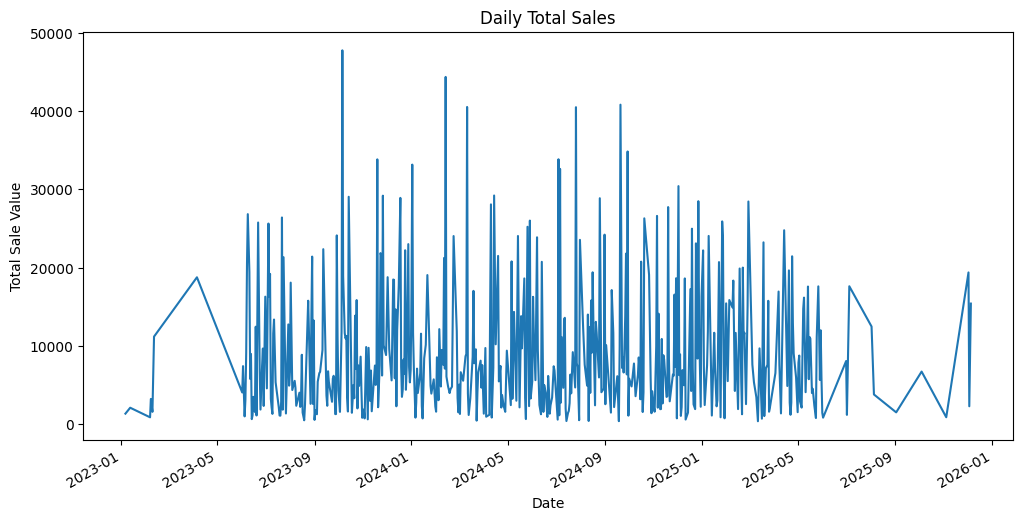

In [ ]:
Sales_Data.groupby('Date')['Total Sale Value'].sum().plot(figsize=(12,6))
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sale Value')
plt.show()

**Restocking Trends Over Time**

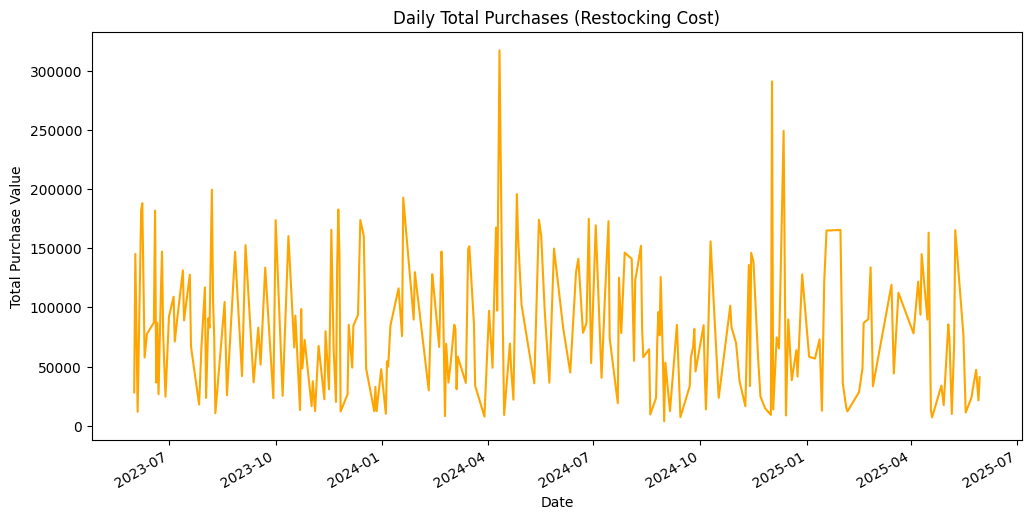

In [ ]:
restocking_records.groupby('Restock Date')['Total Purchase Value'].sum().plot(figsize=(12,6), color='orange')
plt.title('Daily Total Purchases (Restocking Cost)')
plt.xlabel('Date')
plt.ylabel('Total Purchase Value')
plt.show()

**Product-wise Analysis**

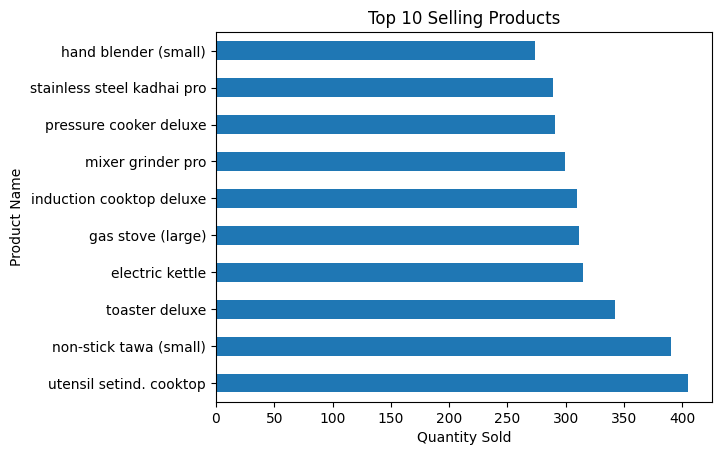

In [ ]:
top_selling = Sales_Data.groupby('Product Name')['Quantity Sold'].sum().sort_values(ascending=False).head(10)
top_selling.plot(kind='barh')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.show()

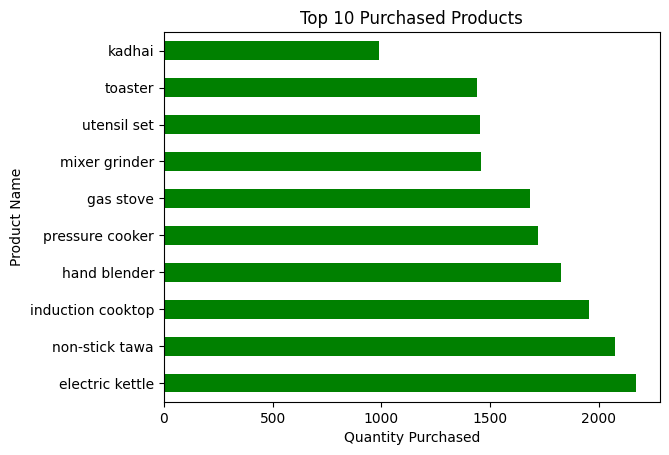

In [ ]:
top_purchased = restocking_records.groupby('Product Name')['Quantity Purchased'].sum().sort_values(ascending=False).head(10)
top_purchased.plot(kind='barh', color='green')
plt.title('Top 10 Purchased Products')
plt.xlabel('Quantity Purchased')
plt.show()

In [ ]:
# # Merge RRD and SD for unit price comparison
# avg_purchase_price = restocking_records.groupby('Product Name')['Purchase Price per Unit'].mean()
# avg_sale_price = Sales_Data.groupby('Product Name')['Sale Price'].mean()

# profit_df = pd.DataFrame({
#     'Avg Purchase Price': avg_purchase_price,
#     'Avg Sale Price': avg_sale_price
# })
# profit_df['Profit per Unit'] = profit_df['Avg Sale Price'] - profit_df['Avg Purchase Price']
# print(profit_df.sort_values('Profit per Unit', ascending=False))